##### Author: Sam Yassien
##### CS 7394

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Data Processing
Source: World Bank (https://data.worldbank.org/indicator/SP.POP.TOTL)

In [2]:
data = pd.read_csv('World3.csv')
data.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
1,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2905195,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
2,Algeria,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,12902626.0,13275020.0,13663581.0,...,36661438,37383899.0,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0
3,American Samoa,20127.0,20605.0,21246.0,22029.0,22850.0,23675.0,24473.0,25235.0,25980.0,...,55755,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0
4,Andorra,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,20760.0,21886.0,...,83748,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0


In [3]:
data.shape

(217, 62)

In [4]:
data[data.isnull().any(axis=1)]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
61,Eritrea,1007586.0,1033320.0,1060489.0,1088859.0,1118152.0,1148188.0,1178875.0,1210304.0,1242633.0,...,3213969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Kuwait,269026.0,300581.0,337346.0,378756.0,423900.0,472032.0,523169.0,577164.0,632911.0,...,3168054,3348852.0,3526382.0,3690939.0,3835588.0,3956862.0,4056102.0,4137314.0,4207077.0,4270563.0
213,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0


In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(214, 62)

In [7]:
data = data.drop(columns=['Country Name'])

# Model Fit and Predict

In [8]:
def build_model(train, modType):
    x = train.iloc[:, 0].values.reshape(-1,1)
    y = train.iloc[:, 1].values.reshape(-1,1)
    model = modType().fit(x,y)
    return model

def predict(model, year):
    return model.predict([[year]])[0][0]

# Predict World Population in 2122

## Method #1:
Create one model for the total population

In [9]:
data2 = pd.read_csv('totalPop.csv')
data2.head()

,Series Name,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Population, total",World,3032156070,3071596055,3124561005,3189655687,3255145692,3322046795,3392097729,3461619724,...,7003760440,7089254548,7175500378,7261846543,7347679005,7433569330,7519183459,7602454161,7683372259,7761620146


In [10]:
data2 = data2.drop(columns=['Series Name' ,'Country Name'])

In [11]:
data_tuples = list(zip(data2.columns.values,data2.iloc[0, : ]))
tempDf = pd.DataFrame(data_tuples, columns=['Year','Population'])

In [12]:
linReg = build_model(tempDf, LinearRegression)
    
predLin1 = predict(linReg, 2122)
print("Linear Regression #1 population prediction = ", np.floor(predLin1))

Linear Regression #1 population prediction =  15953694673.0


### Model plot

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

X = tempDf.iloc[:, 0].values
Y = tempDf.iloc[:, 1].values
x = X.reshape(-1,1)

In [14]:
y_pred = linReg.predict(x)
y_pred = y_pred.reshape(1,-1)

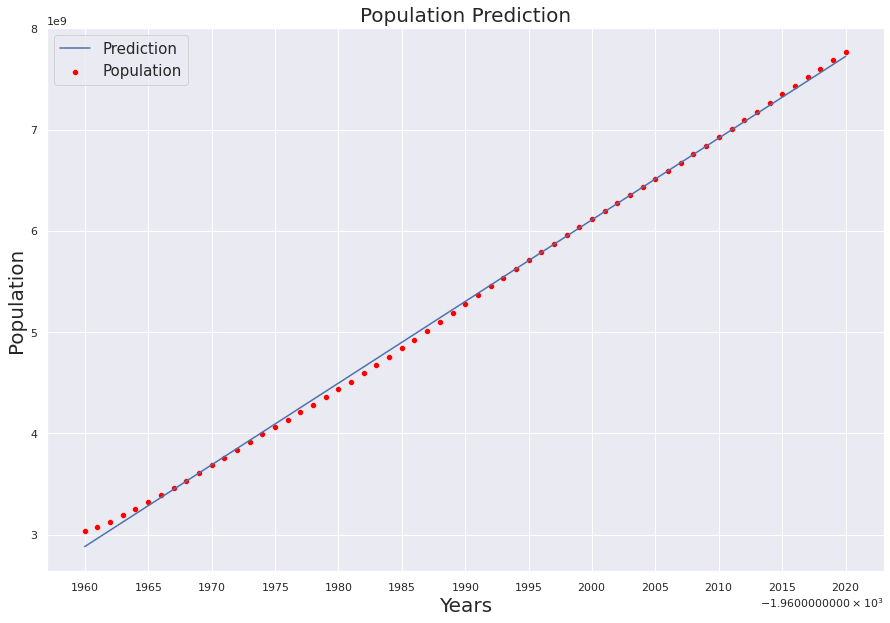

In [15]:
import matplotlib.ticker as ticker

plt.figure(figsize=(15, 10))

sns.set()

ax = sns.scatterplot(X, Y, color = 'red')
sns.lineplot(X, y = y_pred[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(-1960,-2020))
plt.title('Population Prediction', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.legend(['Prediction', 'Population'], fontsize=15 )
plt.savefig("model.png")

plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y, linReg.predict(x), squared=False)
rms
print("RMSE of the linear regression model =", rms)

RMSE of the linear regression model = 41276568.06427081


## Method #2:
- Model the population growth of each country
- Predict the population of one country
- Sum the predictedtions

In [17]:
predLin2 = 0
for index in range(data.shape[0]):
    data_tuples = list(zip(data.columns.values,data.iloc[index, : ]))
    data_tuples
    
    tempDf = pd.DataFrame(data_tuples, columns=['Year','Population'])
    model = build_model(tempDf, LinearRegression)
    
    pred = predict(model, 2122)
    predLin2 = predLin2 + pred
    
print("Linear Regression #1 population prediction = ", np.floor(predLin2))

Linear Regression #1 population prediction =  15874354113.0


Method #2 yields a slightly lower prediction than Method #1 which makes it the better method, but still not enough.

# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Method #1:

In [19]:
data_tuples = list(zip(data2.columns.values,data2.iloc[0, : ]))
tempDf = pd.DataFrame(data_tuples, columns=['Year','Population'])

x = tempDf.iloc[:, 0].values.reshape(-1,1)
y = tempDf.iloc[:, 1].values.reshape(-1,1)

ridge = Ridge(alpha=1.0)
# fit
ridge.fit(x, y)
# predict

predRidge1 = predict(ridge, 2122)

predRidge1

15953131404.865936

In [20]:
rms2 = mean_squared_error(Y, ridge.predict(x), squared=False)
print("RMSE of the ridge regression model =", rms2)

RMSE of the ridge regression model = 41276636.44146911


## Method #2:

In [21]:
predRidge2 = 0
for index in range(data.shape[0]):
    data_tuples = list(zip(data.columns.values,data.iloc[index, : ]))
    data_tuples
    
    tempDf = pd.DataFrame(data_tuples, columns=['Year','Population'])
    model = build_model(tempDf, Ridge)
    
    pred = predict(model, 2122)
    predRidge2 = predRidge2 + pred
    #print(pred)
print("Ridge Regression population prediction = ", predRidge2)

Ridge Regression population prediction =  15873793727.353664


I was curious to see how differently ridge regression will perform on this problem. In both methods it produced almost the same result as the linear regression models, with prediction values lower than that of LR by around 500K.

# Conclusion

Linear Regression is not the optimal solution for our problem. It tends to provide high predictions because it follows population growth data from over the past 80 years only, during which world population boomed. Between 1960 and 2020 (the dataset limits), the world population more than doubled, growing from 3 billion to almost 8 billion. It is reasonable for a linear model to predict that the population doubles in 100 years, given only these information. 

The information extracted from the population data is not enough to make a reliable prediction 100 years in the future. We probably need to look for more data features that contribute to population growth/decline. Such features include (but not limited to): fertility rates, mortality rates, death rates, gross reproduction rates, migration rates, deforestation, climate change, etc…. These features could be consalidated with dimentionality reduction algorithms to extract the most information out of the data that indicate a trend. We then train a neural network on the extracted features. This approach would provide more reliable and data driven predictions.

# Experimenting with time series forcasting models

# ARIMA Model:

In [22]:
from statsmodels.tsa.arima.model import ARIMA
def parser(x):
    return pd.datetime.strptime(x, '%Y')
years = []
years = [parser(x) for x in data2.columns.values]

In [23]:
series = pd.DataFrame(list(data2.iloc[0, : ]), columns=['Population'])
series

,Population
0,3032156070
1,3071596055
2,3124561005
3,3189655687
4,3255145692
...,...
56,7433569330
57,7519183459
58,7602454161
59,7683372259


In [24]:
series.index = years
series.index = series.index.to_period('Y')
series

,Population
1960,3032156070
1961,3071596055
1962,3124561005
1963,3189655687
1964,3255145692
...,...
2016,7433569330
2017,7519183459
2018,7602454161
2019,7683372259


In [25]:
model = ARIMA(series, order=(1,2,0))
fitted_Model = model.fit()
print(fitted_Model.summary())

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                   61
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -949.309
Date:                Mon, 07 Feb 2022   AIC                           1902.618
Time:                        16:01:32   BIC                           1906.773
Sample:                    12-31-1960   HQIC                          1904.240
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0045      0.011     -0.418      0.676      -0.026       0.017
sigma2      3.093e+12   5.23e-16   5.91e+27      0.000    3.09e+12    3.09e+12
Ljung-Box (L1) (Q):                   1.92   Jarque-

/home/sam/anaconda3/envs/aplML/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
start_index = pd.datetime.strptime('2122','%Y')
end_index = pd.datetime.strptime('2122','%Y')
forecast = fitted_Model.predict(start=start_index, end=end_index)
print("Prediction: ")
forecast

Prediction: 


2122    1.574412e+10
Freq: A-DEC, dtype: float64

# Holt-Winters Model:

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

In [28]:
f = SimpleExpSmoothing(series).fit(smoothing_level=0.5,optimized=True,use_brute=True)
print("Prediction: ")
f.predict(start=start_index, end=end_index)

Prediction: 


2122    7.681143e+09
Freq: A-DEC, dtype: float64